## Content

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot 

TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

### Importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [2]:
fashionTrain = pd.read_csv('fashion-mnist_train.csv')
fashionTest = pd.read_csv('fashion-mnist_test.csv')

train = np.array(fashionTrain, dtype = 'float32')
test = np.array(fashionTest, dtype = 'float32')

In [3]:
train.shape

(60000, 785)

In [19]:
train[1,1:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
### 0th column contains the labels

In [4]:
np.unique(train[:,0])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

### Visualize an Image

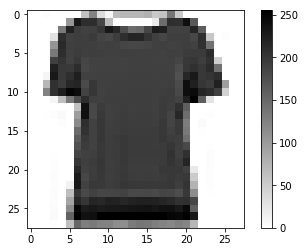

In [12]:
plt.imshow(train[170, 1:].reshape(28, 28),cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

### To show some images

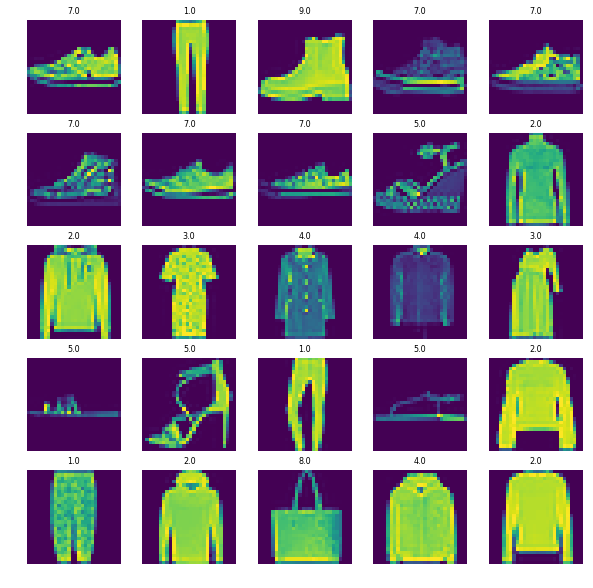

In [15]:
w = 5
l = 5
fig, axes = plt.subplots(l, w, figsize = (10,10))
axes = axes.ravel() #Flatten
for i in np.arange(0, w*l):
    index = np.random.randint(0, 60000)
    axes[i].imshow(train[index, 1:].reshape((28, 28)))
    axes[i].set_title(train[index, 0], fontsize = 8)
    axes[i].axis('off')
#plt.subplots_adjust(hspace = 0.4)

### Normalization

In [28]:
train_1 = train[:, 1:]/255
target_1 = train[:, 0]
test_data = test[:, 1:]/255
test_label = test[:, 0]

### Reshaping our data

In [29]:
train_1 = train_1.reshape(train_1.shape[0], *(28, 28, 1))
test_data = test_data.reshape(test_data.shape[0], *(28, 28, 1))

## Creating a Model 

#### Setting up the layers

##### Alternative way
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [30]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model.add(keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

#### Compile the model

sparse_categorical_crossentropy - we want multiple output. Remember how cross entropy loss is our cost function in logistic regression.

Adam - stochastic gradient descent algorithm for updating weights.
loss- loss function for the stochastic gradient descent algorithm. Since our activation function is softmax our loss function is logarithmic that is categorical_crossentropy. For binary outcome our activation function is sigmoid and our loss function is logarithmic that is binary_crossentropy.

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#### Train the model

In [36]:
model.fit(train_1,
        target_1,
        batch_size = 512,
        epochs=10)

Epoch 1/10
60000/60000 [==============================]60000/60000 [==============================] - 2s 38us/step - loss: 0.2992 - acc: 0.8941

Epoch 2/10
60000/60000 [==============================]60000/60000 [==============================] - 3s 43us/step - loss: 0.2964 - acc: 0.8940

Epoch 3/10
60000/60000 [==============================]60000/60000 [==============================] - 3s 49us/step - loss: 0.2833 - acc: 0.8990

Epoch 4/10
60000/60000 [==============================]60000/60000 [==============================] - 2s 40us/step - loss: 0.2775 - acc: 0.9010

Epoch 5/10
60000/60000 [==============================]60000/60000 [==============================] - 3s 42us/step - loss: 0.2724 - acc: 0.9016

Epoch 6/10
60000/60000 [==============================]60000/60000 [==============================] - 2s 39us/step - loss: 0.2663 - acc: 0.9046

Epoch 7/10
60000/60000 [==============================]60000/60000 [==============================] - 3s 45us/step - loss: 0.2616 

In [37]:
test_loss, test_acc = model.evaluate(test_data, test_label)
print('Test accuracy: {:.3f}', test_acc)

10000/10000 [==============================]10000/10000 [==============================] - 1s 51us/step

Test accuracy: {:.3f} 0.8849


In [38]:
predictions = model.predict(test_data)
predictions[0]

array([8.4907037e-01, 2.3687146e-08, 1.7566873e-04, 6.5498287e-05,
       3.8607039e-05, 5.6816158e-14, 1.5064038e-01, 1.2767543e-11,
       9.4687621e-06, 7.6191519e-16], dtype=float32)

In [39]:
np.argmax(predictions[0])

0

In [41]:
test_label[0]

0.0